# TNN: Total n00b Notebook

I have a very limited understanding of this challenge (other than knowing what a Rubik’s Cube is), but it seems very interesting. I have no hopes of making it high on the leaderboard, but it seems worthwhile to learn more about the techniques involved in the challenge.

Because I assume that other people are in my situation, I am working with ChatGPT to better understand the nature of the challenge. 

The first step in my journey is taking the **very simple** puzzle from the "getting started" notebook and creating some visuals to better understand the move steps.

I am a Physician and Data Science hobbyist, so I am using GPT and Copilot to help with writing code. But the ideas in this notebook are my own.


In [2]:
import numpy as np
import pandas as pd
from ast import literal_eval
from pathlib import Path
from pprint import pprint
from sympy.combinatorics import Permutation

# Here is a very simple puzzle
solution_state = ['R', 'G', 'B']
initial_state = ['B', 'G', 'R']
moves = {
    'r': [1, 2, 0],
    's': [1, 0, 2],
}
r = moves['r']
s = moves['s']

This is a function that plots the current state of the 3 element puzzle

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_state_squares(state, title, scale=0.75):
    """
    Plot a state of the puzzle with each element represented as a true square.
    
    :param state: List of color initials (e.g., ['R', 'G', 'B'])
    :param title: Title of the plot
    :param scale: Scale factor for the size of squares (default is 0.75)
    """
    color_map = {'R': 'red', 'G': 'green', 'B': 'blue'}
    fig_size = len(state) * scale
    fig, ax = plt.subplots(figsize=(fig_size, scale))

    # Calculate the offset and size of each square based on the scale factor
    offset = (1 - scale) / 2
    size = scale

    # Create a true square for each element in the state
    for i, color_initial in enumerate(state):
        color = color_map.get(color_initial, 'white')  # Default to white if unknown color
        rect = patches.Rectangle((i + offset, offset), size, size, linewidth=1, edgecolor='black', facecolor=color)
        ax.add_patch(rect)

    # Setting the limits and removing the axes for clarity
    ax.set_xlim(0, len(state))
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')  # Ensuring squares are displayed as true squares
    ax.axis('off')
    ax.set_title(title)

    plt.show()


### Look at what the 2 moves, "r" and "s", do to the puzzle

```
moves = {
    'r': [1, 2, 0],
    's': [1, 0, 2],
}
```
- ```r``` effectively rotates the color of the squares, moving each square rightwards in a circular manner.
- ```s``` swaps the position of the first 2 squares and leaves the 3rd unchanged

Initially, I am just manipulating the state using a list comprehension.


['G', 'R', 'B']
['R', 'B', 'G']
['B', 'G', 'R']


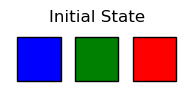

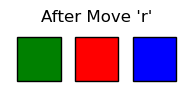

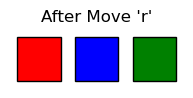

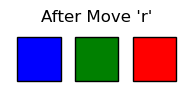

In [15]:
# Applying 3 r moves in a row
first_move = [initial_state[i] for i in r]
print(first_move)
second_move = [first_move[i] for i in r]
print(second_move)
third_move = [second_move[i] for i in r]
print(third_move)

# Re-plotting the initial state, the state after each move, and the solution state with smaller squares
plot_state_squares(initial_state, "Initial State")
plot_state_squares(first_move, "After Move 'r'")
plot_state_squares(second_move, "After Move 'r'")
plot_state_squares(third_move, "After Move 'r'")



### Looking at the intial state and the solution state

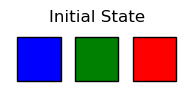

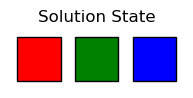

In [16]:
# plot initial state
plot_state_squares(initial_state, "Initial State")
# plot solution state  
plot_state_squares(solution_state, "Solution State")

We can see that moving the puzzle one step to the right places the blue square in the correct position. After that, it is just a matter of switching the first 2 square (function ```s```). 

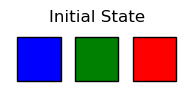

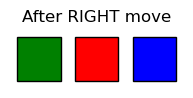

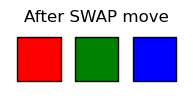

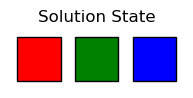

Does second_move == solution_state?  True


In [18]:
# plot initial state
plot_state_squares(initial_state, "Initial State")

first_move = [initial_state[i] for i in r]
plot_state_squares(first_move, "After RIGHT move")

second_move = [first_move[i] for i in s]
plot_state_squares(second_move, "After SWAP move")

plot_state_squares(solution_state, "Solution State")

print("Does second_move == solution_state? ", second_move == solution_state)

Now I understand how a game state and a moves dictionary can be used to transition game states. I was a little confused about converting the state from a ```list``` to an ```np.array```. 

But it does simplify the transition because you can just input the array from the move dictionary to transition the state, i.e. ```initial_state_np[r]```. So this now makes some sense to me.

This simplifies the syntax for state transitions, and transitions can be performed in sequence.

initial_state = ['B' 'G' 'R']
initial_state[r] = ['G' 'R' 'B']
initial_state[r][r] = ['R' 'B' 'G']
initial_state[r][s] = ['R' 'G' 'B']
Does two_moves == solution_state? True


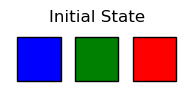

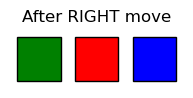

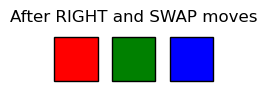

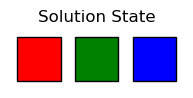

In [35]:
# convert initial_state to an np.array
initial_state_np = np.array(initial_state)
solution_state_np = np.array(solution_state)

# reiterating the moves dictionary
moves = {
    'r': [1, 2, 0],
    's': [1, 0, 2],
}
r = moves['r']
s = moves['s']

print(f"initial_state = {initial_state_np}")

# apply 1 r move to initial state
print(f"initial_state[r] = {initial_state_np[r]}")

# apply 2 r moves to initial state
print(f"initial_state[r][r] = {initial_state_np[r][r]}")

# apply 1 r move followed by 1 s move to initial state
two_moves = initial_state_np[r][s]
print(f"initial_state[r][s] = {two_moves}")

# check if two_moves is the same as solution_state for all positions
result = (two_moves == solution_state_np).all()

print(f"Does two_moves == solution_state? {(two_moves == solution_state).all()}")

plot_state_squares(initial_state_np, "Initial State")
plot_state_squares(initial_state_np[r], "After RIGHT move")
plot_state_squares(initial_state_np[r][s], "After RIGHT and SWAP moves")
plot_state_squares(solution_state, "Solution State")


I'm still grappling with the concept of permutation arrays. While I can follow the logic when I'm actively working with them, it's challenging to keep a clear understanding in my mind.

- **Permutation Array**: In a permutation array, each element specifies the new position of the element at that index. For example, consider `r = [1, 2, 0]`:
    - Here, `r[0] = 1` implies that the first element in the transformed state takes its value from the second element in the initial state (since indexing starts at 0). So, if `initial_state[1]` is 'G', then `transformed_state[0]` will be 'G'.
    - This concept is somewhat clear to me, but it still feels a bit perplexing at times.

- **Inverse Permutation Array**: Applying `np.argsort(r)` to a permutation array `r` returns the indices that would sort the array. When used on a permutation array, `np.argsort(r)` yields the inverse permutation. This inverse indicates the final positions of the elements from the original array in their sorted order. 

I'm getting a grasp of these ideas, but I can't say I've fully internalized them just yet. 🤯😓


[1, 0, 2]
[1, 0, 2]


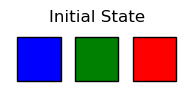

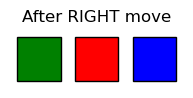

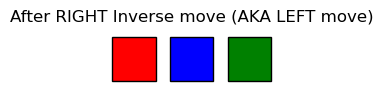

In [53]:
r_inv = np.argsort(r).tolist()
s_inv = np.argsort(s).tolist()

# there is no inverse for the swap move
print(s)
print(s_inv)

plot_state_squares(initial_state_np, "Initial State")
plot_state_squares(initial_state_np[r], "After RIGHT move")
plot_state_squares(initial_state_np[r_inv], "After RIGHT Inverse move (AKA LEFT move)")


### Exploring SymPy and Permutations in Puzzle Solving

- **Discovering SymPy**: The example notebook introduced the SymPy library, and it's quite fascinating. It specializes in symbolic computation, handling mathematical expressions as symbols rather than through numerical approximations. It's like translating emojis in math: 😀 + 🔥 equals 🥵! The library covers a broad spectrum, including algebra, calculus, discrete math, geometry, plotting, and even code generation. It's definitely on my list for deeper exploration.

- **The `Permutation` Function**: The `Permutation` function in `sympy.combinatorics` seems helpful for solving these puzzles, where permutation operations are more intuitively expressed and computed using a specialized class.

- **Applicability for Puzzles**: While the `Permutation` class might be excessive for simpler puzzles, it seems highly promising for tackling more complex challenges in my upcoming puzzle-solving endeavors.

- **Understanding Disjoint Cycle Form**: The concept of "disjoint cycle form" in permutations is still a bit of a puzzle to me 🤔. From what I gather, it involves breaking down a sequence of moves into cycles that are independent of each other, streamlining the process of understanding and executing these moves.


r: (0 1 2) 	Sends 0 -> 1, 1 -> 2, and 2 -> 0.
s: (2)(0 1) 	Sends 0 -> 1, 1 -> 0, and 2 stays fixed.
Effect of r: ['G', 'R', 'B']
Effect of s: ['G', 'B', 'R']


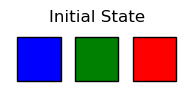

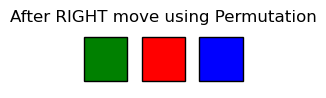

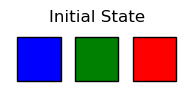

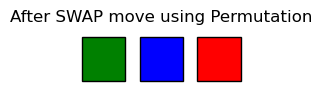

In [56]:
# reminder about the import call
from sympy.combinatorics import Permutation

# this is from the tutorial
rp = Permutation(r)
sp = Permutation(s)
print('r:', rp, "\tSends 0 -> 1, 1 -> 2, and 2 -> 0.")
print('s:', sp, "\tSends 0 -> 1, 1 -> 0, and 2 stays fixed." )

# A Permutation is a function which you can apply to a state with a function call
print("Effect of r:", rp(initial_state))
print("Effect of s:", sp(initial_state))

plot_state_squares(initial_state, "Initial State")
plot_state_squares(rp(initial_state), "After RIGHT move using Permutation")
plot_state_squares(initial_state, "Initial State")
plot_state_squares(sp(initial_state), "After SWAP move using Permutation")

### Progress and Challenges with Understanding Permutations

- **Current Understanding**: So far, I'm making progress (sort of) with understanding permutations. While there's more to learn, I'm able to follow along for the most part. 

- **Struggling with Inverse Permutations**: I'm encountering some difficulty in grasping why the inverse of a permutation is represented as the negative power of the function, like `rp_inv = rp ** -1`. 

    - **Permutation Function Basics**: A permutation function maps a set of elements to itself but in a different order. The inverse of this permutation effectively undoes this mapping, bringing the elements back to their original order.

    - **Inverse Operations in SymPy**: In SymPy, the `Permutation` class facilitates inverse operations using the negative power notation. This approach is rooted in group theory in mathematics, where raising an element to a negative power is equivalent to finding its inverse in the group context.

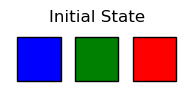

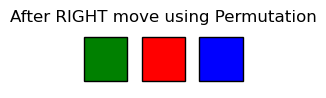

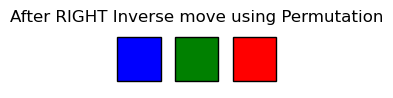

In [57]:
rp_inv = rp**-1
sp_inv = sp**-1

plot_state_squares(initial_state, "Initial State")
next_state = rp(initial_state)
plot_state_squares(next_state, "After RIGHT move using Permutation")
return_state = rp_inv(next_state)
plot_state_squares(return_state, "After RIGHT Inverse move using Permutation")

## Exploring the 6x6 Wreath Puzzle

### Initial Steps

I'm now turning my attention to the **6x6 Wreath Puzzle**, as it appears to be one of the more approachable challenges. My initial focus will be on two key aspects:

1. **Loading Puzzles**: Understanding how to import or load puzzles into my working environment. This is the first step in interacting with the puzzle data.

2. **Loading Available Moves**: Figuring out how to access and comprehend the set of possible moves. This is crucial for devising strategies to solve the puzzle.

### Visualization and Strategy Development

- Once the puzzles and moves are loaded, the next step will be to explore ways to **visualize the wreath puzzle**. Visualization is a powerful tool to keep track of the moves and to understand the state of the puzzle at any given moment.

- Additionally, visualization will aid in **evaluating the distance to the solution**. By having a clear picture of the puzzle's current state, I can better assess how close I am to solving it and adjust my strategies accordingly.

In [94]:
# local data_dir
data_dir = Path("data")

puzzle_info = pd.read_csv(data_dir / 'puzzle_info.csv', index_col='puzzle_type')
# Parse allowed_moves
puzzle_info['allowed_moves'] = puzzle_info['allowed_moves'].apply(literal_eval)

puzzles_all = pd.read_csv(data_dir / 'puzzles.csv', index_col='id')
# Parse color states
puzzles_all = puzzles_all.assign(
    initial_state=lambda df: df['initial_state'].str.split(';'),
    solution_state=lambda df: df['solution_state'].str.split(';')
)

In [95]:
wreath_6_6_info = puzzle_info.loc['wreath_6/6', 'allowed_moves']
# convert keys from wreath_6_6_info to a list
wreath_6_6_moves = list(wreath_6_6_info.keys())
print(wreath_6_6_moves)

['l', 'r']


In [102]:
# Extracting info for 'wreath_6/6' puzzles
wreath_6_6_moves_dict = puzzle_info.loc['wreath_6/6', 'allowed_moves']
moves = list(wreath_6_6_moves_dict.keys())

wreath_6_6_puzzles = puzzles_all[puzzles_all['puzzle_type'] == 'wreath_6/6']
# get a list of loc indices for wreath_6/6 puzzles
wreath_6_6_idx = wreath_6_6_puzzles.index.tolist()



# Now you can access the allowed moves for 'wreath_6/6' using the dictionary
# For example:
print(allowed_moves_dict['wreath_6/6'])

# And you have the wreath_6_6_puzzles DataFrame containing all puzzles of this type
print(wreath_6_6_puzzles.head())

{'l': [1, 2, 3, 4, 5, 0, 6, 7, 8, 9], 'r': [6, 1, 8, 3, 4, 5, 7, 2, 9, 0]}
    puzzle_type                  solution_state  \
id                                                
284  wreath_6/6  [C, A, C, A, A, A, B, B, B, B]   
285  wreath_6/6  [C, A, C, A, A, A, B, B, B, B]   
286  wreath_6/6  [C, A, C, A, A, A, B, B, B, B]   
287  wreath_6/6  [C, A, C, A, A, A, B, B, B, B]   
288  wreath_6/6  [C, A, C, A, A, A, B, B, B, B]   

                      initial_state  num_wildcards  
id                                                  
284  [A, A, A, A, B, C, B, C, B, B]              0  
285  [B, A, B, A, B, A, C, A, B, C]              2  
286  [A, B, C, A, A, C, B, B, B, A]              2  
287  [B, C, B, C, A, A, B, A, B, A]              2  
288  [A, A, C, B, C, A, B, B, A, B]              0  


## Challenges in Visualizing the Puzzle

### Current Approach

The current code is designed to visualize the puzzle as two rings (left and right), each with the capability of independent rotation, and sharing two common points. This model attempts to reflect the mechanics of the puzzle's movement.

### Issues Encountered

However, upon closer examination of the permutations `l` and `r`, several discrepancies have emerged:

- **L-Permutation Complexity**:
  - The `l-permutation` seems to only affect the early elements in the puzzle. This observation suggests a simpler pattern of movement than initially thought.

- **R-Permutation Complexity**:
  - Conversely, the `r-permutation` appears to induce more complex changes. These changes aren't adequately represented by the current model of two independently rotating rings with two shared points.

### Next Steps

- At this point, the path forward for the visualization is unclear. The simplistic model does not capture the intricacies revealed by the permutations.
- A deeper analysis or a different approach to modeling might be necessary to develop a more accurate visualization of the puzzle dynamics.

In [103]:
def print_wreath_puzzle(state):
    """
    Print a text-based visualization of the wreath_6/6 puzzle.

    :param state: List representing the state of each point on the wreath puzzle (10 elements).
    """
    # Ensuring the state has 10 elements
    if len(state) != 10:
        raise ValueError("State must have 10 elements.")

    # Constructing the layout
    # Note: Points at index 5 and 6 are the common points between the two rings
"""     layout = [
        f"   {state[1]}   {state[2]}      {state[7]}   {state[8]}",
        f"{state[0]}         {state[5]}          {state[9]}",
        "     l          r",
        f"{state[4]}         {state[6]}          {state[3]}",
        f"   {state[5]}   {state[6]}     {state[7]}  {state[8]}"
    ] """

    layout = [
        f"         {state[4]}      {state[7]}   {state[8]}",
        f"{state[3]}         {state[5]}          {state[9]}",
        "     l          r",
        f"{state[2]}         {state[6]}          {state[3]}",
        f"   {state[0]}   {state[6]}     {state[7]}  {state[8]}"
    ]

    # Printing the layout
    for line in layout:
        print(line)

# get first puzzle index
idx = wreath_6_6_idx[0]
puzzle_initial = wreath_6_6_puzzles.loc[idx, 'initial_state']
puzzle_solution = wreath_6_6_puzzles.loc[idx, 'solution_state']

print("Initial State:")
print_wreath_puzzle(puzzle_initial)
print(f"{'-'*45}\nSolution State:")
print_wreath_puzzle(puzzle_solution)


Initial State:
   A   A      C   B
A         C          B
     l          r
B         B          A
   C   B     C  B
---------------------------------------------
Solution State:
   A   C      B   B
C         A          B
     l          r
A         B          A
   A   B     B  B


In [108]:
# start turning the puzzle with a call to l
puzzle_state = puzzle_initial.copy()
l = Permutation(wreath_6_6_moves_dict['l'])
r = Permutation(wreath_6_6_moves_dict['r'])

print('Initial State list:')
print(puzzle_state)
print(f"{'-'*45}")
print("Initial State:")
print_wreath_puzzle(puzzle_state)
print(f"{'-'*45}")
puzzle_state = l(puzzle_state)
print("After l move:")
print(puzzle_state)
print(f"{'-'*45}")
print_wreath_puzzle(puzzle_state)


Initial State list:
['A', 'A', 'A', 'A', 'B', 'C', 'B', 'C', 'B', 'B']
---------------------------------------------
Initial State:
   A   A      C   B
A         C          B
     l          r
B         B          A
   C   B     C  B
---------------------------------------------
After l move:
['A', 'A', 'A', 'B', 'C', 'A', 'B', 'C', 'B', 'B']
---------------------------------------------
   A   A      C   B
A         A          B
     l          r
C         B          B
   A   B     C  B


## Reassessing the Approach to the Wreath Puzzle

### Decision on Visualization

After considering the challenges and complexities mentioned earlier, I have decided to **abandon the attempt to create a visualization** for the wreath puzzle. The intricacies involved in accurately representing the puzzle's movements exceed the capabilities of the simplistic model initially proposed.

### Exploring Heuristic Approaches for Solving the Puzzle

In lieu of visualization, my focus shifts toward identifying an effective heuristic method for solving the puzzle:

- **Potential Search Algorithms**:
  - Preliminary research suggests that algorithms like **A\* (A-Star)** or **Greedy Best-First Search** might be suitable starting points.

- **Considering Heuristic Options**:
  - Two heuristic approaches under consideration are the **Hamming distance** and the **Manhattan distance**.
  - **Hamming Distance**: This method involves counting the number of positions in which the current state differs from the solution state. It's seemingly the more straightforward approach.
  - **Manhattan Distance**: Calculating the Manhattan distance appears to be more challenging and potentially less feasible for this specific problem.

### Moving Forward

The next steps will involve a deeper exploration into these heuristic methods, assessing their suitability and efficacy in tackling the wreath puzzle's complexities.
